<a href="https://colab.research.google.com/github/thuynt0201/DOAN_VEGGIEEMPIRE/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/R Python/Bank_Personal_Loan_Modelling.csv")
df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Xem personal loan
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [ ]:
# Tạp dữ liệu để train model
y = df['Personal Loan'].values.reshape(-1,1)
x= df.drop(columns=['Personal Loan'])


In [ ]:
print(x.shape)
print(y.shape)

(5000, 13)
(5000, 1)


In [ ]:
#Chia dữ liệu
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train , y_test = train_test_split(x,y,random_state = 42,test_size=0.1)



In [30]:
#xây dựng cây
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [31]:
# dự đoán trên dữ liệu test
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[437   9]
 [  6  48]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


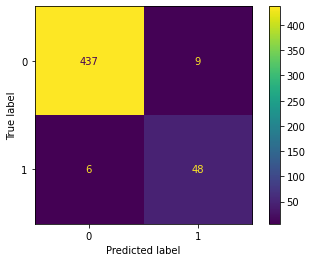

In [34]:
plot_confusion_matrix(dt, x_test, y_test)

In [46]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

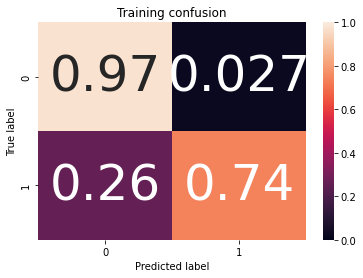

In [47]:
y_pred = dt.predict(x_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

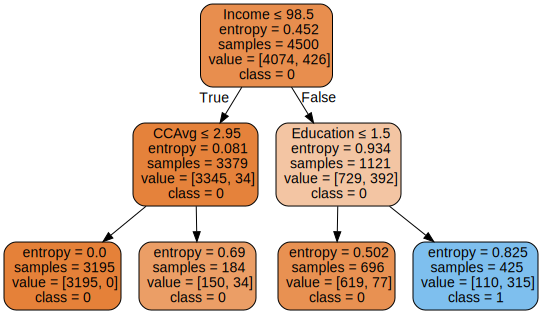

In [33]:
import graphviz 

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=df.drop('Personal Loan', axis=1).columns,    
    class_names=df['Personal Loan'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [35]:
#del final_fi

# Calculating FI
for i, column in enumerate(df.drop('Personal Loan', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature ID:, 0.000
Importance of feature Age:, 0.000
Importance of feature Experience:, 0.000
Importance of feature Income:, 0.590
Importance of feature ZIP Code:, 0.000
Importance of feature Family:, 0.000
Importance of feature CCAvg:, 0.122
Importance of feature Education:, 0.288
Importance of feature Mortgage:, 0.000
Importance of feature Securities Account:, 0.000
Importance of feature CD Account:, 0.000
Importance of feature Online:, 0.000
Importance of feature CreditCard:, 0.000


,index,Variable,Feature Importance Score
0,3,Income,0.590323
1,7,Education,0.287540
2,6,CCAvg,0.122138
3,0,ID,0.000000
4,1,Age,0.000000
5,2,Experience,0.000000
6,4,ZIP Code,0.000000
7,5,Family,0.000000
8,8,Mortgage,0.000000
9,9,Securities Account,0.000000


In [36]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(x_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(x_test, y_test))

Training Accuracy is:  0.9508888888888889
Testing Accuracy is:  0.97
